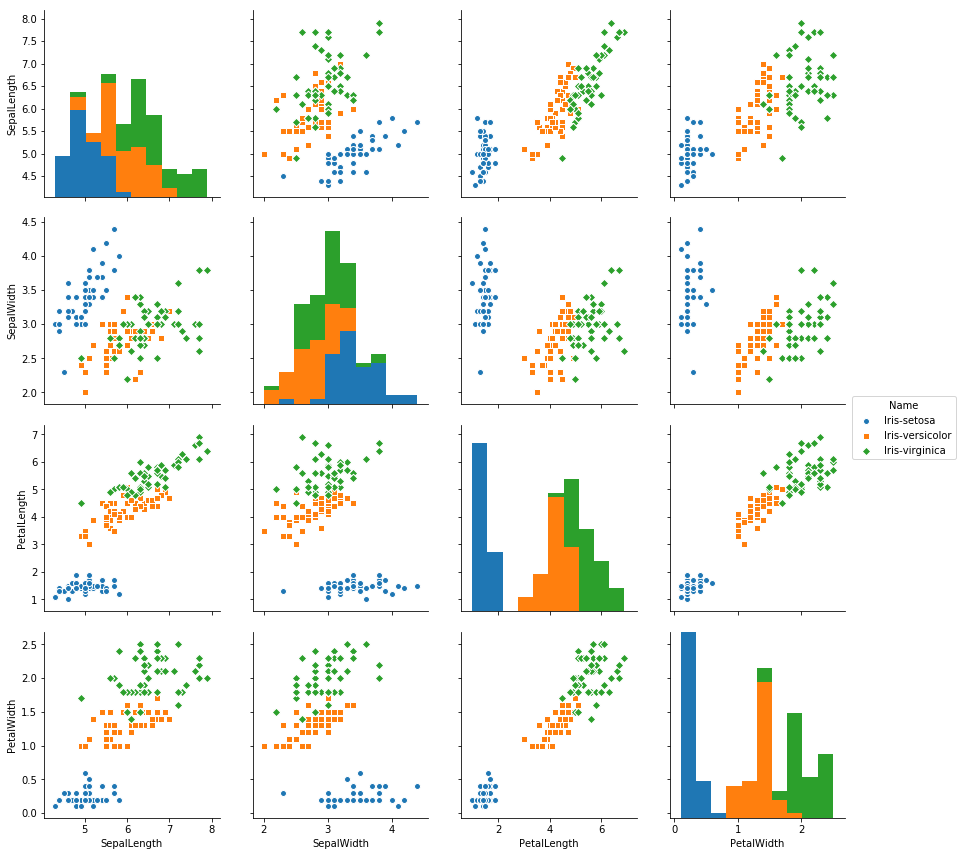

In [4]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("iris.csv")
plt.figure()
sns.pairplot(data, hue = "Name", size=3, markers=["o", "s", "D"])
plt.show()

In [57]:
# Importing data 
data = pd.read_csv("iris.csv")

# Function for calculating euclidean distance
def euclidean_distance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x]) 
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclidean_distance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
        #### End of STEP 3.1
        
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5
    
# Creating a dummy testset
testSet = [1.2, 3.6, 1.1, 2.5]
test = pd.DataFrame(testSet)
#### Start of STEP 2
# Setting number of neighbors = 3
k =3
#### End of STEP 2
#Running KNN model
result,neigh = knn(data, test, k)
print result


Iris-setosa
